In [1]:
#Importacion de bibliotecas
import pandas as pd 
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import fitter as ft
#import chardet


Analisis preliminar de la data

In [2]:

df = pd.read_csv("TP1_data.csv",  sep= ";", thousands= ',', decimal = '.')
#Elimino los tabs del dataFrame habia tabs en las dos ultimas columnas
df = df.replace('\t', '', regex=True)
df.info() #Observo que hay datos faltantes en Toneladas pedidas, Tiempo de Carga y Tiempo de Entrega
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   #Pedido                  1000 non-null   object 
 1   Fecha Ingreso Pedido     1000 non-null   object 
 2   Hora Ingreso Pedido      1000 non-null   int64  
 3   Destino                  1000 non-null   object 
 4   Toneladas Pedidas        997 non-null    float64
 5   Tiempo de Carga (min)    999 non-null    object 
 6   Tiempo de Entrega (min)  997 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 54.8+ KB


(1000, 7)

Renombramiento de Columnas

In [3]:
#Replazo los espacion por guion bajo
df = df.rename(columns=lambda x: x.replace(' ', '_'))
df = df.rename(columns={'#Pedido' : 'Pedido'})

df.head(5)

,Pedido,Fecha_Ingreso_Pedido,Hora_Ingreso_Pedido,Destino,Toneladas_Pedidas,Tiempo_de_Carga_(min),Tiempo_de_Entrega_(min)
0,#0901003,1/1/22,14,Junín,6.0,40,41
1,#0901004,1/1/22,11,Tandil,5.0,21,410
2,#0901005,1/1/22,15,Junín,10.0,32,41
3,#0901006,1/2/22,9,Tandil,5.0,30,38
4,#0901007,1/2/22,14,Junín,5.0,39,45


FALTANTES


In [4]:
#Asigno faltantes para filtrar
faltantes = df.isnull()

#Veo donde faltan los resultados
total_faltantes = faltantes.sum()

print(total_faltantes) #Faltan 7 datos

#Chequeo si los faltantes estan todos en la misma linea o en diferentes
print(faltantes.value_counts()) #faltan en 7 filas diferentes

#Filas con datos faltantes
faltantes_por_columna = faltantes.sum(axis=1).astype(bool)

filas_con_faltantes = df[faltantes_por_columna]

filas_con_faltantes

Pedido                     0
Fecha_Ingreso_Pedido       0
Hora_Ingreso_Pedido        0
Destino                    0
Toneladas_Pedidas          3
Tiempo_de_Carga_(min)      1
Tiempo_de_Entrega_(min)    3
dtype: int64
Pedido  Fecha_Ingreso_Pedido  Hora_Ingreso_Pedido  Destino  Toneladas_Pedidas  Tiempo_de_Carga_(min)  Tiempo_de_Entrega_(min)
False   False                 False                False    False              False                  False                      993
                                                                                                      True                         3
                                                            True               False                  False                        3
                                                            False              True                   False                        1
Name: count, dtype: int64


,Pedido,Fecha_Ingreso_Pedido,Hora_Ingreso_Pedido,Destino,Toneladas_Pedidas,Tiempo_de_Carga_(min),Tiempo_de_Entrega_(min)
33,#0901036,1/15/22,17,Junín,NaN,37,39
248,#0901251,3/29/22,17,Junín,NaN,21,43
285,#0901288,4/8/22,10,Mar del Plata,NaN,39,49
346,#0901349,5/1/22,11,Junín,12.0,29,NaN
488,#0901491,6/24/22,16,La Plata,6.0,25,NaN
601,#0901604,8/3/22,16,Mar del Plata,8.0,28,NaN
920,#0901923,11/29/22,9,Mar del Plata,10.0,NaN,43


Limpio la data
    -Pedidos
        ~Elimno el #
        ~Cambio el tipo de dato a int
    -Fecha_Ingreso_Pedido 
        ~Cambiar tipo de dato a fecha
    -Hora_Ingreso_Pedido (OK)
    -Destino
        ~Pasar a category
    -Toneladas_Pedidas (OK)
    -Tiempo_de_Carga
        ~Elimino los dos primero caracteres
        ~Modifico a int
    - Tiempo_de_Entrega
        ~idem anterior

In [5]:
#Pedido
#Elimino el "#"
df.Pedido = df.Pedido.astype(str)
df['Pedido'] = df['Pedido'].str.replace('#', '')
#Modifico el tipo a int
df.Pedido = df.Pedido.astype(int)

#Fecha Ingreso Pedido to_datetime
df['Fecha_Ingreso_Pedido'] = pd.to_datetime(df['Fecha_Ingreso_Pedido'])

#Destino --> Category
df.Destino = pd.Categorical(df['Destino'])
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Pedido                   1000 non-null   int32         
 1   Fecha_Ingreso_Pedido     1000 non-null   datetime64[ns]
 2   Hora_Ingreso_Pedido      1000 non-null   int64         
 3   Destino                  1000 non-null   category      
 4   Toneladas_Pedidas        997 non-null    float64       
 5   Tiempo_de_Carga_(min)    999 non-null    object        
 6   Tiempo_de_Entrega_(min)  997 non-null    object        
dtypes: category(1), datetime64[ns](1), float64(1), int32(1), int64(1), object(2)
memory usage: 44.8+ KB


C:\Users\rjiam\AppData\Local\Temp\ipykernel_976\3967202240.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Fecha_Ingreso_Pedido'] = pd.to_datetime(df['Fecha_Ingreso_Pedido'])


In [6]:
#Reviso columna Hora_Ingreso_Pedido

df['Hora_Ingreso_Pedido'].describe() #Hay por lo menos un valor que es > 24
#Chequeo cuantos hay, encuentro solamente uno
hora_fuera_de_rango = df[df["Hora_Ingreso_Pedido"] > 23] # Hay solo un dato
#hora_fuera_de_rango

df.loc[hora_fuera_de_rango.index, 'Hora_Ingreso_Pedido'] = np.nan
hora_fuera_de_rango

df[df['Hora_Ingreso_Pedido'] == np.nan]

df.loc[189]
# df = df.drop(hora_fuera_de_rango.index)#Elimino la fila, se puede hacer algo mejor
# df.head()

Pedido                                  901192
Fecha_Ingreso_Pedido       2022-03-05 00:00:00
Hora_Ingreso_Pedido                        NaN
Destino                                  Junín
Toneladas_Pedidas                         12.0
Tiempo_de_Carga_(min)                      28 
Tiempo_de_Entrega_(min)                    47 
Name: 189, dtype: object

In [7]:
#Destino
print(df['Destino'].cat.categories)#Todas las

serie_categorias = df['Destino'].value_counts() # Veo que los nombres correctos son los 5 primeros

#Uso el .index e itero sobre los primeros 5 valores
dict_categorias = serie_categorias.to_dict()

indice = serie_categorias.index

for i in indice:
    dict_categorias[i] = ''

#Hago los primeros 5 de manera automatica
for i in range(0,5):
    dict_categorias[indice[i]] = indice[i]

# A mano uno por uno hay que reemplazar por el nombre correcto
dict_categorias['MDQ'] = indice[0]
dict_categorias['Mar delPlata'] = indice[0]
dict_categorias['Mardel Plata'] = indice[0] 
dict_categorias['Mardel'] = indice[0]
dict_categorias['Juní n'] = indice[1] 
dict_categorias['Junin'] = indice[1]
dict_categorias['JUNIN'] = indice[1]
dict_categorias[' Tandil'] = indice[2]
dict_categorias['TANDIL'] = indice[2]
dict_categorias['Tandill'] = indice[2]
dict_categorias['LA PLATA'] = indice[3]
dict_categorias['LaPlata'] = indice[3]
dict_categorias['Olavarria'] = indice[4]
print(dict_categorias)


Index([' Tandil', 'JUNIN', 'Junin', 'Juní n', 'Junín', 'LA PLATA', 'La Plata',
       'LaPlata', 'MDQ', 'Mar del Plata', 'Mar delPlata', 'Mardel',
       'Mardel Plata', 'Olavarria', 'Olavarría', 'TANDIL', 'Tandil',
       'Tandill'],
      dtype='object')
{'Mar del Plata': 'Mar del Plata', 'Junín': 'Junín', 'Tandil': 'Tandil', 'La Plata': 'La Plata', 'Olavarría': 'Olavarría', 'MDQ': 'Mar del Plata', 'Olavarria': 'Olavarría', 'JUNIN': 'Junín', 'Mardel': 'Mar del Plata', 'TANDIL': 'Tandil', 'Mardel Plata': 'Mar del Plata', ' Tandil': 'Tandil', 'Mar delPlata': 'Mar del Plata', 'LaPlata': 'La Plata', 'LA PLATA': 'La Plata', 'Juní n': 'Junín', 'Junin': 'Junín', 'Tandill': 'Tandil'}


In [8]:
#Mapeo el diccionario para no tener incosistencia en los nombres de la ciudades
df['Destino'] = df['Destino'].map(dict_categorias)
df['Destino'] = pd.Categorical(df['Destino'])
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Pedido                   1000 non-null   int32         
 1   Fecha_Ingreso_Pedido     1000 non-null   datetime64[ns]
 2   Hora_Ingreso_Pedido      999 non-null    float64       
 3   Destino                  1000 non-null   category      
 4   Toneladas_Pedidas        997 non-null    float64       
 5   Tiempo_de_Carga_(min)    999 non-null    object        
 6   Tiempo_de_Entrega_(min)  997 non-null    object        
dtypes: category(1), datetime64[ns](1), float64(2), int32(1), object(2)
memory usage: 44.3+ KB


In [9]:
#Elimine los espacios de las últimas dos columnas
df['Tiempo_de_Carga_(min)'] = df['Tiempo_de_Carga_(min)'].replace(' ', '')
df['Tiempo_de_Entrega_(min)'] = df['Tiempo_de_Entrega_(min)'].replace(' ', '')

Agrego uina columna con los dias de la semana

In [10]:
#Fechas
#Dia de semana
df['Dia_Semana'] = df['Fecha_Ingreso_Pedido'].dt.dayofweek
df['Dia_Semana'] = df.Dia_Semana.astype(int)

dias = ['LU', 'MA', 'MI', 'JU', 'VI', 'SA', 'DO']

for day in dias:
    df.loc[df['Dia_Semana'] == dias.index(day), 'Dia_Semana'] = day

df.Dia_Semana = pd.Categorical(df['Dia_Semana'])

Eliminé toda las filas com datos nulos(se puede hacer algo mejor)

In [11]:
#Tiempo de carga
#Hay datos que no son numeros!!!!
#Armo una funcion para ver cuales son
expresion_regular = '\d' #Es solo numeros (REVISAR -- > FUNCIONA BIEN PERO A MI ENTENDER DEBERIAMOS SELECCIONAR DE LA FORMA OPUESTA)

filter_criteria = df['Tiempo_de_Carga_(min)'].str.contains(expresion_regular, regex = True)
print(filter_criteria)
no_numericos_tiempo_de_carga  = df[np.logical_not(filter_criteria)]
#Modifico el contenido de las columnas a NaN
df.loc[no_numericos_tiempo_de_carga.index, 'Tiempo_de_Carga_(min)'] = np.nan
#Muestro entradas elimindas
#no_numericos_tiempo_de_carga.index

0      True
1      True
2      True
3      True
4      True
       ... 
995    True
996    True
997    True
998    True
999    True
Name: Tiempo_de_Carga_(min), Length: 1000, dtype: object


In [12]:
#Tiempo de Entrega
#Selecciono datos que no son numeros
filter_criteria = df['Tiempo_de_Entrega_(min)'].str.contains(expresion_regular, regex = True)
#Reemplazo por Nan
no_numericos_tiempo_de_entrega = df[np.logical_not(filter_criteria)]
df.loc[no_numericos_tiempo_de_entrega.index, 'Tiempo_de_Entrega_(min)'] = np.nan
#Muestro las filas elimindas


In [13]:
#Modifico los datos de Tiempo de Carga y Tiempo de Entrega a numeric (LO IDEAL ES A INT PERO HAY SEPARADOR DECIMAL'.' Y NO ENCONTRÉ COMO HACERLO)
df['Tiempo_de_Carga_(min)'] = pd.to_numeric(df['Tiempo_de_Carga_(min)'])
df['Tiempo_de_Entrega_(min)'] = pd.to_numeric(df['Tiempo_de_Entrega_(min)'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Pedido                   1000 non-null   int32         
 1   Fecha_Ingreso_Pedido     1000 non-null   datetime64[ns]
 2   Hora_Ingreso_Pedido      999 non-null    float64       
 3   Destino                  1000 non-null   category      
 4   Toneladas_Pedidas        997 non-null    float64       
 5   Tiempo_de_Carga_(min)    995 non-null    float64       
 6   Tiempo_de_Entrega_(min)  996 non-null    float64       
 7   Dia_Semana               1000 non-null   category      
dtypes: category(2), datetime64[ns](1), float64(4), int32(1)
memory usage: 45.6 KB


~AGREGO COLUMNAS DE INTERES PARA EL ENUNCIADO~

In [14]:
#Agrego columna Tons_OK si las toneladas estan entre 3 y 12 includos (PREGUNTAR SI SE INCLUYEN)
df.loc[(df['Toneladas_Pedidas'] <= 12) & (df['Toneladas_Pedidas'] >=3), 'Tons_OK'] = True
df['Tons_OK'] = df['Tons_OK'].fillna(value= False)
df['Tons_OK'] = df['Tons_OK'].astype(bool)
df.shape

(1000, 9)

In [15]:
#Tarifa = 15$ * tons * distancia
#Armo DataFrame con las distancias
distancias = {'Destino' : ['La Plata', 'Mar del Plata', 'Tandil', 'Junín', 'Olavarría'],
              'Distancia' : [86,443, 363, 251, 361]}
distancias = pd.DataFrame(distancias)
distancias['Destino'] = pd.Categorical(distancias['Destino'])
#Uno los dataframes
df = df.merge(distancias, how = 'inner', on = 'Destino')

df['Tarifa'] = 15 * df['Distancia'] * df['Toneladas_Pedidas']
df['Tarifa'] = df['Tarifa'].astype(float)
df.head()
#df['Tarifa'] = 15 * df['Distancia'] * df['Toneladas_Pedidas']

,Pedido,Fecha_Ingreso_Pedido,Hora_Ingreso_Pedido,Destino,Toneladas_Pedidas,Tiempo_de_Carga_(min),Tiempo_de_Entrega_(min),Dia_Semana,Tons_OK,Distancia,Tarifa
0,901003,2022-01-01,14.0,Junín,6.0,40.0,41.0,SA,True,251,22590.0
1,901005,2022-01-01,15.0,Junín,10.0,32.0,41.0,SA,True,251,37650.0
2,901007,2022-01-02,14.0,Junín,5.0,39.0,45.0,DO,True,251,18825.0
3,901008,2022-01-03,12.0,Junín,10.0,37.0,37.0,LU,True,251,37650.0
4,901010,2022-01-04,15.0,Junín,9.0,37.0,36.0,MA,True,251,33885.0


In [16]:
#Costo por km camión

df['Costo_variable_camion'] = df['Distancia'] * 13
print(df.columns)

df = df[['Pedido', 'Fecha_Ingreso_Pedido', 'Dia_Semana', 'Hora_Ingreso_Pedido', 'Destino',
       'Toneladas_Pedidas', 'Tons_OK', 'Tiempo_de_Carga_(min)', 'Tiempo_de_Entrega_(min)', 'Distancia', 'Tarifa',
       'Costo_variable_camion']]

Index(['Pedido', 'Fecha_Ingreso_Pedido', 'Hora_Ingreso_Pedido', 'Destino',
       'Toneladas_Pedidas', 'Tiempo_de_Carga_(min)', 'Tiempo_de_Entrega_(min)',
       'Dia_Semana', 'Tons_OK', 'Distancia', 'Tarifa',
       'Costo_variable_camion'],
      dtype='object')


In [17]:
#Exportacion de data limpia
#df.to_csv('TP1_datalimpia.csv', sep = ';')

-----------------------ANALISIS DE DATOS----------------

In [18]:
#Importamos matplotlib.pyplot



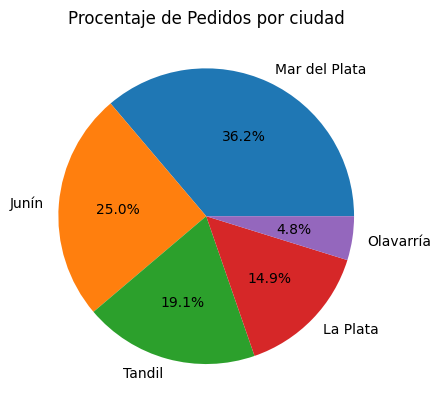

In [196]:
#Analisis de pedidos por ciudad
counts = df['Destino'].value_counts()
plt.pie(counts.values, labels = counts.index, autopct= '%1.1f%%')
plt.title(label = "Procentaje de Pedidos por ciudad")
plt.show()

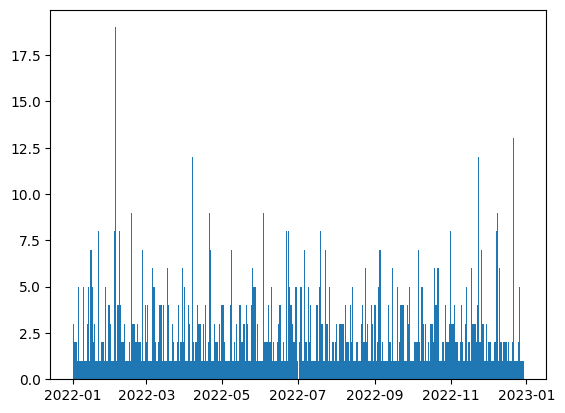

In [20]:
fecha = df['Fecha_Ingreso_Pedido']

plt.hist(fecha.values, bins = 365)
plt.show()


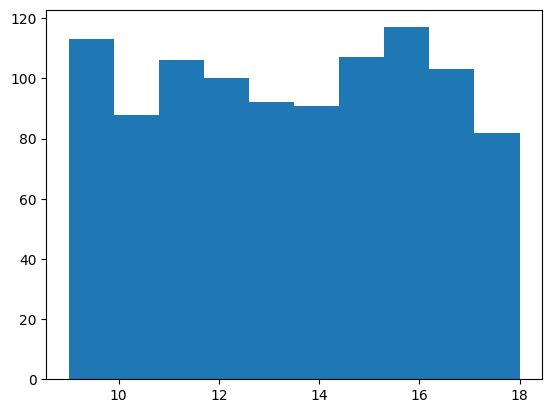

999


Power_divergenceResult(statistic=11.329191919191919, pvalue=0.25381759440418605)

In [21]:
#Hago un grafico para ver las distribucion por hora

plt.hist(df['Hora_Ingreso_Pedido'], bins = 10)
plt.show()
df['Hora_Ingreso_Pedido'].describe() #Rango de datos entre las 9-18hs ->POSIBLE HORARIO DE ATENCION

horas = df['Hora_Ingreso_Pedido'].dropna().value_counts()
horasdf = pd.DataFrame(horas)

print(df['Hora_Ingreso_Pedido'].count())

horas
horas = [117,113,107,106,103,100,92,91,88,82]

chi = stats.chisquare(horas, f_exp= [100,100,100,100,100,100,100,100,100,99])
chi
#stats.chisquare()

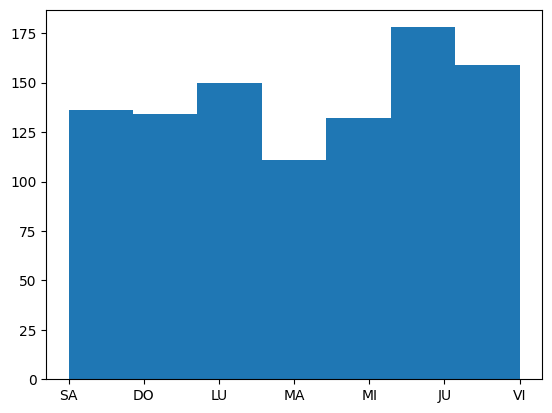

,Pedido,Fecha_Ingreso_Pedido,Dia_Semana,Hora_Ingreso_Pedido,Destino,Toneladas_Pedidas,Tons_OK,Tiempo_de_Carga_(min),Tiempo_de_Entrega_(min),Distancia,Tarifa,Costo_variable_camion
2,901007,2022-01-02,DO,14.0,Junín,5.0,True,39.0,45.0,251,18825.0,3263
6,901022,2022-01-09,DO,17.0,Junín,6.0,True,36.0,37.0,251,22590.0,3263
7,901023,2022-01-09,DO,11.0,Junín,5.0,True,23.0,39.0,251,18825.0,3263
13,901043,2022-01-16,DO,10.0,Junín,6.0,True,27.0,41.0,251,22590.0,3263
46,901161,2022-02-20,DO,13.0,Junín,8.0,True,34.0,41.0,251,30120.0,3263
...,...,...,...,...,...,...,...,...,...,...,...,...
961,901216,2022-03-13,DO,17.0,Olavarría,11.0,True,32.0,39.0,361,59565.0,4693
971,901501,2022-06-26,DO,15.0,Olavarría,6.0,True,28.0,40.0,361,32490.0,4693
976,901643,2022-08-21,DO,14.0,Olavarría,10.0,True,33.0,45.0,361,54150.0,4693
980,901684,2022-09-04,DO,13.0,Olavarría,8.0,True,30.0,42.0,361,43320.0,4693


In [22]:
#dia de la semana

plt.hist(df['Dia_Semana'], bins = 7)
plt.show()

df[df['Dia_Semana'] == 'DO']


['LU', 'MA', 'MI', 'JU', 'VI', 'SA', 'DO']


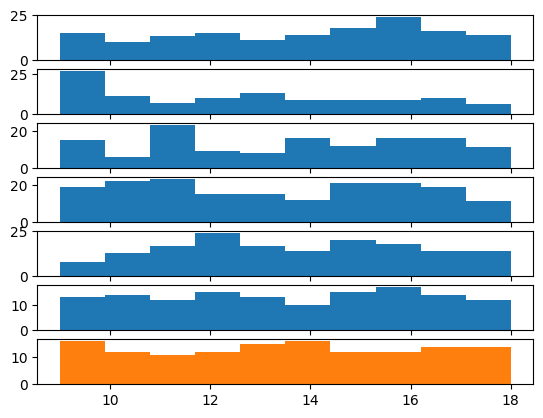

In [23]:
#Hago un histograma para ver como se ditribuyen los dias de pedido por ciudad (5GRAFICOS)
fig, ax = plt.subplots(7)

print(dias)
for dia in range(0,7):
    por_dia = df[df['Dia_Semana'] == dias[dia]]
    hora_por_dia = por_dia['Hora_Ingreso_Pedido']
    #print(hora_por_dia.values)
    ax[dia].hist(hora_por_dia.values)
    #ax[dia].title()


plt.hist(hora_por_dia)
plt.show()


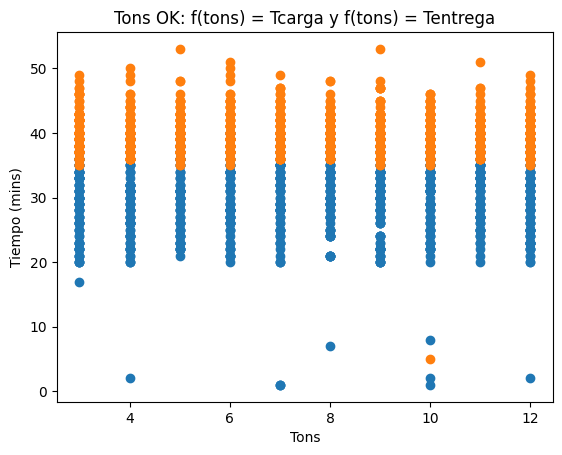

In [24]:
correlation_mat = df.corr(numeric_only= True)
#sns.heatmap(correlation_mat, annot = True)

tons_ok = df[df['Tons_OK']]
limpiado = tons_ok[(tons_ok['Tiempo_de_Carga_(min)'] < 100) & (tons_ok['Tiempo_de_Entrega_(min)'] < 100)]

plt.scatter(x = limpiado['Toneladas_Pedidas'], y = limpiado['Tiempo_de_Carga_(min)'],)
plt.scatter(x = limpiado['Toneladas_Pedidas'], y = limpiado['Tiempo_de_Entrega_(min)'])
plt.ylabel('Tiempo (mins)')
plt.xlabel('Tons')
plt.title('Tons OK: f(tons) = Tcarga y f(tons) = Tentrega')
plt.show()


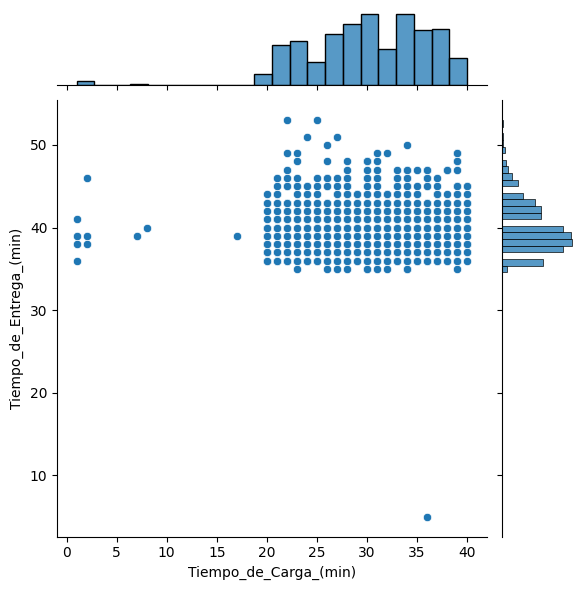

In [25]:
import seaborn as sns
# Puedo verificar si hay correlación entre dos variables ... por ejemplo: tiempo de atención y tiempo de espera 

sns.jointplot(data=df[(df['Tiempo_de_Carga_(min)']< 100) & (df['Tiempo_de_Entrega_(min)'] < 100)], x="Tiempo_de_Carga_(min)", y="Tiempo_de_Entrega_(min)")

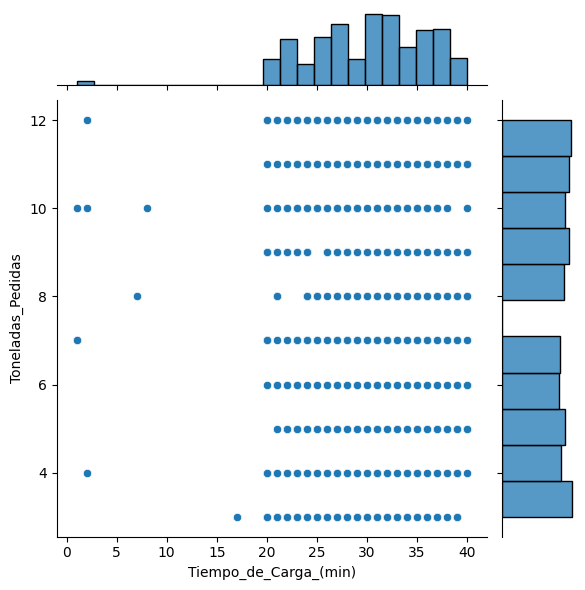

In [26]:

sns.jointplot(data=df[(df['Tiempo_de_Carga_(min)']< 100) & (df['Tiempo_de_Entrega_(min)'] < 100) & (df['Toneladas_Pedidas'] < 20) ], x="Tiempo_de_Carga_(min)", y='Toneladas_Pedidas')

In [32]:
#Tiempo de carga
df['Tiempo_de_Carga_(min)'].describe()

df[df['Tiempo_de_Carga_(min)'] > 100]

,Pedido,Fecha_Ingreso_Pedido,Dia_Semana,Hora_Ingreso_Pedido,Destino,Toneladas_Pedidas,Tons_OK,Tiempo_de_Carga_(min),Tiempo_de_Entrega_(min),Distancia,Tarifa,Costo_variable_camion
276,901147,2022-02-17,JU,11.0,Tandil,10.0,True,210.0,37.0,363,54450.0,4719
612,901063,2022-01-23,DO,17.0,Mar del Plata,6.0,True,420.0,2.0,443,39870.0,5759
815,901674,2022-09-01,JU,16.0,Mar del Plata,4.0,True,140.0,42.0,443,26580.0,5759


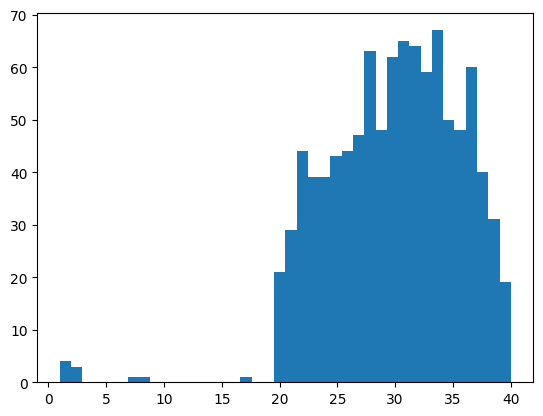

In [33]:
#plt.plot(df['Tiempo_de_Carga_(min)'])

tiempo_de_carga = df[df['Tiempo_de_Carga_(min)'] < 100]
tiempo_de_carga = tiempo_de_carga[tiempo_de_carga['Tiempo_de_Carga_(min)'] > 15]
plt.hist(df[df['Tiempo_de_Carga_(min)'] < 100]['Tiempo_de_Carga_(min)'] , bins = 40)
plt.show()
#plt.hist(df[df['Tiempo_de_Carga_(min)'] < 100])
#plt.show()

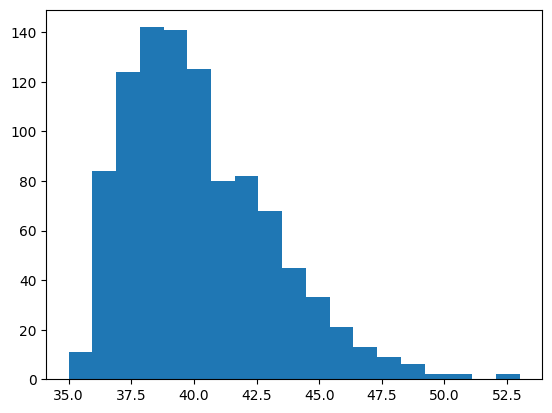

In [34]:
#TIEMPO DE ENTREGA
plt.hist(df[(df['Tiempo_de_Entrega_(min)'] < 100)&(df['Tiempo_de_Entrega_(min)'] > 10)]['Tiempo_de_Entrega_(min)'], bins = 19)
plt.show()

In [35]:
#Pedidos feriado
print(min(df['Fecha_Ingreso_Pedido']))
print(max(df['Fecha_Ingreso_Pedido']))

2022-01-01 00:00:00
2022-12-30 00:00:00


In [36]:
# data =  df[(df['Tiempo_de_Entrega_(min)'] < 100)&(df['Tiempo_de_Entrega_(min)'] > 10)]['Tiempo_de_Entrega_(min)'];
# f = ft.Fitter(data, bins = 19, timeout = 100)
# f.fit()

In [37]:
#f.summary()

In [38]:
data =  df[(df['Tiempo_de_Entrega_(min)'] < 100)&(df['Tiempo_de_Entrega_(min)'] > 10)]['Tiempo_de_Entrega_(min)'];
f = ft.Fitter(data, distributions = ft.get_common_distributions(), bins = 19)
f.fit()

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  9.34it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
lognorm,0.001646,145.340911,-13153.375804,inf,0.080638,4.777767e-06
gamma,0.001940,145.739393,-12990.714165,inf,0.074954,2.774995e-05
rayleigh,0.002550,153.554729,-12727.043508,inf,0.112105,2.713776e-11
norm,0.007278,168.451133,-11688.557650,inf,0.137334,9.502461e-17
cauchy,0.009463,149.478746,-11428.643264,inf,0.148145,1.980997e-19


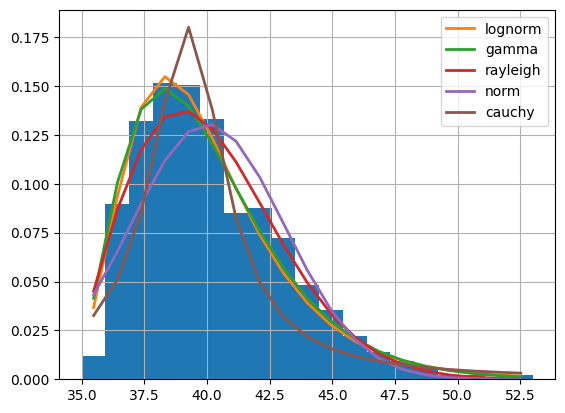

In [39]:
f.summary()

In [40]:
f.fitted_param['gamma']

(3.2176664958199632, 34.42952099950803, 1.7362358691386612)

[]

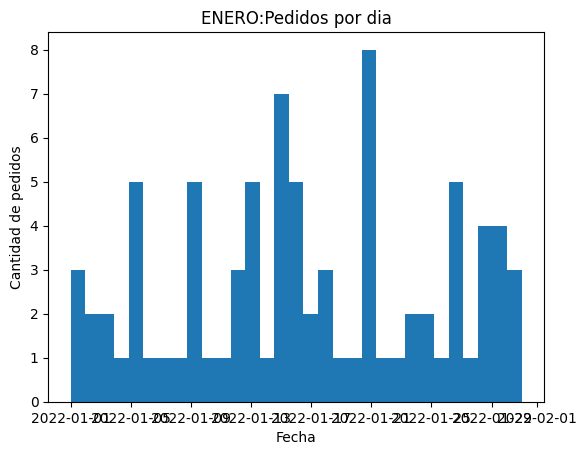

In [41]:
plt.hist(df[df['Fecha_Ingreso_Pedido'] < '2022-02-01']['Fecha_Ingreso_Pedido'].values, bins = 31)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pedidos')
plt.title('ENERO:Pedidos por dia')
plt.plot()

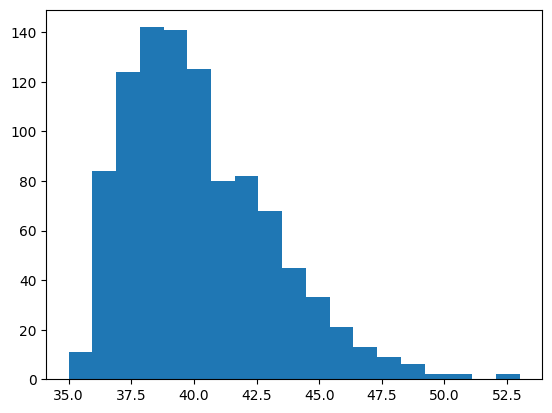

In [42]:
t_entrega = df[(df['Tiempo_de_Entrega_(min)'] < 100) & (df['Tiempo_de_Entrega_(min)'] > 10)]['Tiempo_de_Entrega_(min)']
plt.hist(t_entrega, bins = 19)
plt.show()

In [43]:
t_entrega = t_entrega-min(t_entrega)

FitParams(s=1.0, loc=0.8577446011180941, scale=1.0)


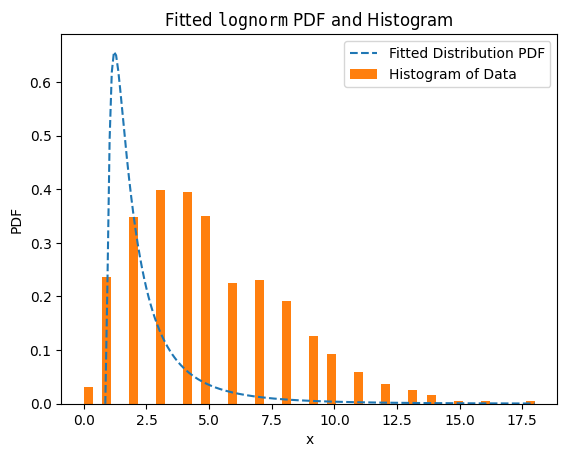

In [44]:
res = stats.fit(dist = stats.lognorm, data = t_entrega, bounds = [(0,1), (0,35)])
print(res.params)
res.plot()
plt.show()

In [45]:
df[(df['Tiempo_de_Entrega_(min)'] > 100) | (df['Tiempo_de_Entrega_(min)'] < 10)]['Tiempo_de_Entrega_(min)']

207    370.0
250    410.0
440    500.0
612      2.0
753      5.0
755    433.0
Name: Tiempo_de_Entrega_(min), dtype: float64

,Pedido,Fecha_Ingreso_Pedido,Dia_Semana,Hora_Ingreso_Pedido,Destino,Toneladas_Pedidas,Tons_OK,Tiempo_de_Carga_(min),Tiempo_de_Entrega_(min),Distancia,Tarifa,Costo_variable_camion
45,901155,2022-02-18,VI,12.0,Junín,7.0,True,1.02,36.0,251,26355.0,3263
276,901147,2022-02-17,JU,11.0,Tandil,10.0,True,210.00,37.0,363,54450.0,4719
301,901307,2022-04-16,SA,16.0,Tandil,10.0,True,2.00,46.0,363,54450.0,4719
330,901456,2022-06-10,VI,11.0,Tandil,10.0,True,8.00,40.0,363,54450.0,4719
417,901899,2022-11-24,JU,18.0,Tandil,4.0,True,2.00,39.0,363,21780.0,4719
521,901525,2022-07-04,LU,16.0,La Plata,10.0,True,1.00,41.0,86,12900.0,1118
612,901063,2022-01-23,DO,17.0,Mar del Plata,6.0,True,420.00,2.0,443,39870.0,5759
723,901385,2022-05-16,LU,17.0,Mar del Plata,7.0,True,1.00,39.0,443,46515.0,5759
725,901390,2022-05-17,MA,13.0,Mar del Plata,12.0,True,2.00,38.0,443,79740.0,5759
727,901392,2022-05-18,MI,17.0,Mar del Plata,7.0,True,1.00,38.0,443,46515.0,5759


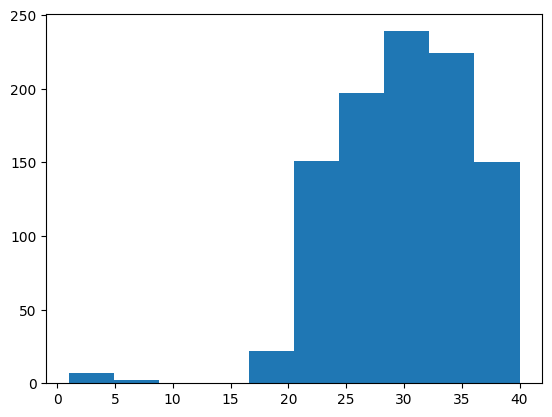

In [46]:
plt.hist(df[df['Tiempo_de_Carga_(min)'] < 100]['Tiempo_de_Carga_(min)'])

df[(df['Tiempo_de_Carga_(min)'] < 10) | (df['Tiempo_de_Carga_(min)'] > 100)]

In [47]:
data =  df[(df['Tons_OK']) & (df['Destino'] == 'Mar del Plata')]['Toneladas_Pedidas'];
f = ft.Fitter(data, distributions = ft.get_common_distributions(), bins = 10)
f.fit()

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  7.11it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
uniform,0.002907,47.944492,-4222.532353,0.011361,0.140966,0.000001
rayleigh,0.018637,51.351493,-3551.834603,0.080581,0.134149,0.000004
norm,0.018772,51.819158,-3549.224262,0.083196,0.127367,0.000015
lognorm,0.018906,53.806227,-3540.772636,0.083734,0.129091,0.000011
gamma,0.018928,53.813071,-3540.343226,0.083638,0.129132,0.000010


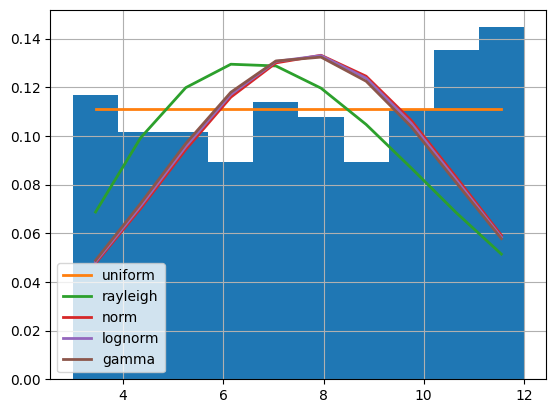

In [48]:
f.summary()

In [49]:
df[df['Destino'] == 'Olavarría'].count()

Pedido                     48
Fecha_Ingreso_Pedido       48
Dia_Semana                 48
Hora_Ingreso_Pedido        48
Destino                    48
Toneladas_Pedidas          48
Tons_OK                    48
Tiempo_de_Carga_(min)      48
Tiempo_de_Entrega_(min)    48
Distancia                  48
Tarifa                     48
Costo_variable_camion      48
dtype: int64

In [50]:
destinos = df['Destino'].value_counts(normalize= True)

destinos.values
print(destinos.index)
np.cumsum(destinos.values)


CategoricalIndex(['Mar del Plata', 'Junín', 'Tandil', 'La Plata', 'Olavarría'], categories=['Junín', 'La Plata', 'Mar del Plata', 'Olavarría', 'Tandil'], ordered=False, dtype='category', name='Destino')


array([0.362, 0.612, 0.803, 0.952, 1.   ])

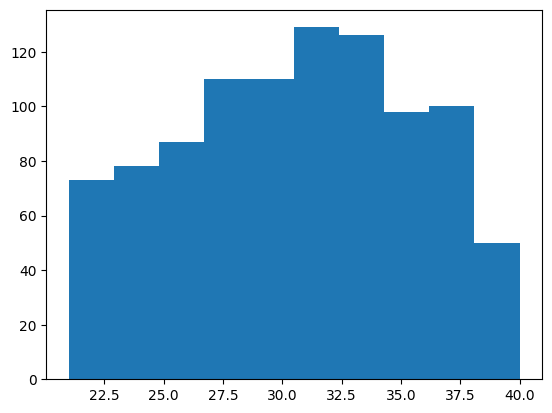

In [51]:
tiempo_de_carga = df[(df['Tiempo_de_Carga_(min)'] < 100) & (df['Tiempo_de_Carga_(min)'] >20)]['Tiempo_de_Carga_(min)']
plt.hist(tiempo_de_carga)
tiempo_de_carga.to_csv('Tiempo_de_Carga.csv', sep = ';')

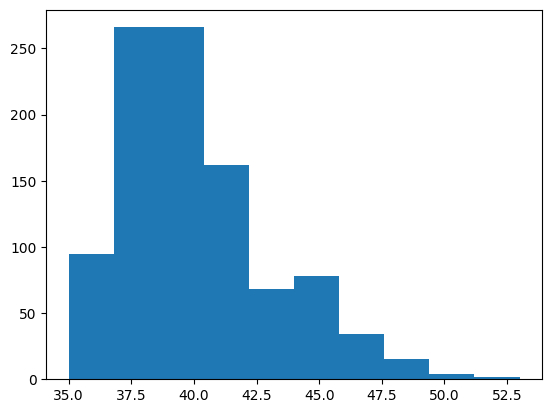

In [52]:
tiempo_de_entrega = df[(df['Tiempo_de_Entrega_(min)'] < 120) & (df['Tiempo_de_Entrega_(min)'] > 5)]['Tiempo_de_Entrega_(min)']
plt.hist(tiempo_de_entrega)

tiempo_de_entrega.to_csv('Tiempo_de_Entrega.csv', sep = ";")

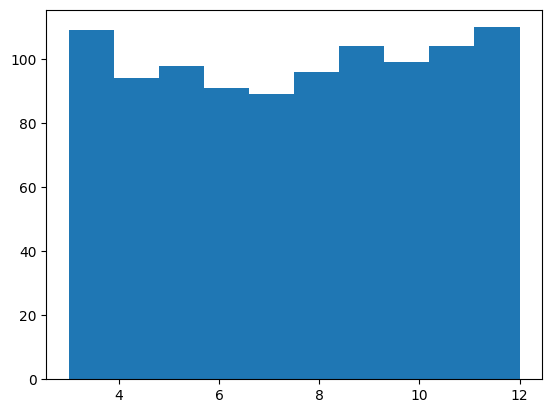

In [53]:
tons = df[df['Tons_OK']][['Toneladas_Pedidas','Destino']]
plt.hist(tons['Toneladas_Pedidas'])
tons.to_csv('Tons.csv', sep = ';')

In [54]:
df

,Pedido,Fecha_Ingreso_Pedido,Dia_Semana,Hora_Ingreso_Pedido,Destino,Toneladas_Pedidas,Tons_OK,Tiempo_de_Carga_(min),Tiempo_de_Entrega_(min),Distancia,Tarifa,Costo_variable_camion
0,901003,2022-01-01,SA,14.0,Junín,6.0,True,40.0,41.0,251,22590.0,3263
1,901005,2022-01-01,SA,15.0,Junín,10.0,True,32.0,41.0,251,37650.0,3263
2,901007,2022-01-02,DO,14.0,Junín,5.0,True,39.0,45.0,251,18825.0,3263
3,901008,2022-01-03,LU,12.0,Junín,10.0,True,37.0,37.0,251,37650.0,3263
4,901010,2022-01-04,MA,15.0,Junín,9.0,True,37.0,36.0,251,33885.0,3263
...,...,...,...,...,...,...,...,...,...,...,...,...
995,901856,2022-11-10,JU,13.0,Olavarría,8.0,True,39.0,41.0,361,43320.0,4693
996,901869,2022-11-14,LU,15.0,Olavarría,12.0,True,33.0,37.0,361,64980.0,4693
997,901870,2022-11-14,LU,16.0,Olavarría,6.0,True,34.0,45.0,361,32490.0,4693
998,901900,2022-11-24,JU,16.0,Olavarría,6.0,True,22.0,37.0,361,32490.0,4693


Fecha_Ingreso_Pedido
1     0.376374
2     0.219780
3     0.129121
4     0.115385
5     0.063187
6     0.027473
7     0.024725
8     0.021978
9     0.010989
12    0.005495
19    0.002747
13    0.002747
Name: proportion, dtype: float64


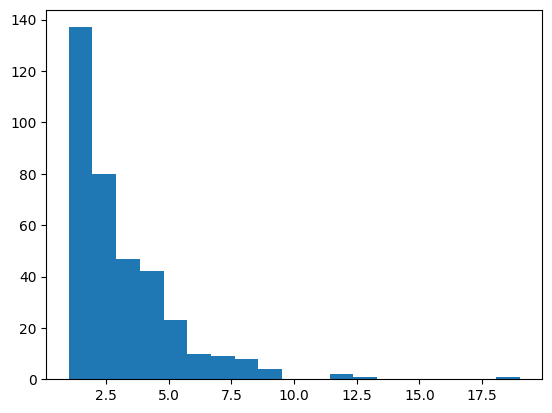

In [74]:
pedidos_por_dia = df['Fecha_Ingreso_Pedido'].groupby(by = df['Fecha_Ingreso_Pedido']).count()
frec_pedidos = pedidos_por_dia.value_counts(normalize= True)
# plt.pie(frec_pedidos,labels = frec_pedidos.index)
print(frec_pedidos)
plt.hist(pedidos_por_dia, bins = 19)
plt.show()


FitParams(n=49.0, p=0.056066377624605195, loc=0.0)


<AxesSubplot:title={'center':'Fitted $\\tt binom$ PMF and Histogram'}, xlabel='k', ylabel='PMF'>

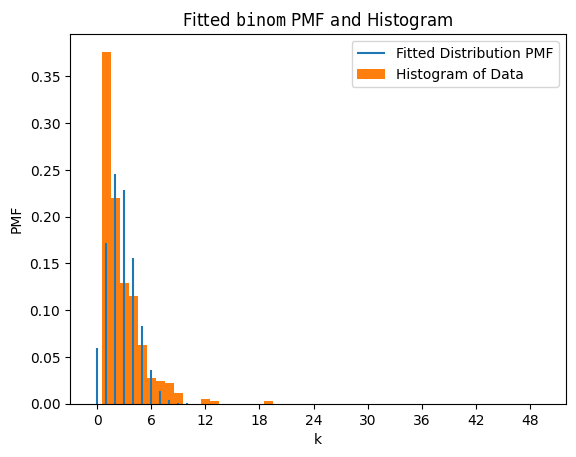

In [92]:
res = stats.fit(data = pedidos_por_dia, dist = stats.binom, bounds= [(0,50),(0,100)])
print(res.params)
res.plot()

Fecha_Ingreso_Pedido
1    0.410959
0    0.378082
2    0.120548
3    0.060274
4    0.010959
6    0.008219
7    0.005479
5    0.005479
Name: proportion, dtype: float64


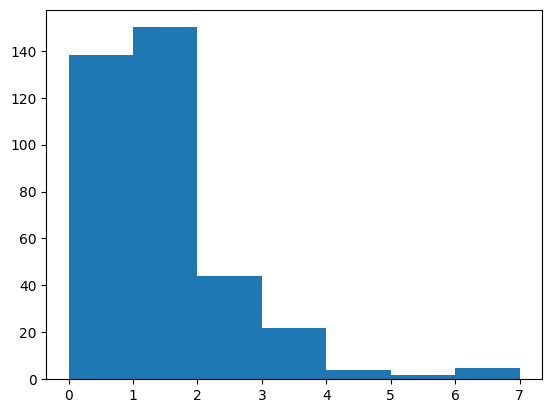

In [208]:
df1 = df[df['Destino'] == "Mar del Plata"]
pedidos_por_dia = df1['Fecha_Ingreso_Pedido'].groupby(by = df1['Fecha_Ingreso_Pedido']).size().reindex(pd.date_range(start= '2022-01-01', end= '2022-12-31'), fill_value=0)
frec_pedidos = pedidos_por_dia.value_counts(normalize= True)

#plt.pie(frec_pedidos,labels = frec_pedidos.index)
print(frec_pedidos)
plt.hist(pedidos_por_dia, bins = 7)
plt.show()

Fecha_Ingreso_Pedido
2022-01-05    3
2022-01-06    1
2022-01-07    1
2022-01-10    1
2022-01-12    1
             ..
2022-12-25    1
2022-12-26    1
2022-12-27    3
2022-12-29    1
2022-12-30    1
Name: Fecha_Ingreso_Pedido, Length: 227, dtype: int64

In [191]:
stats.poisson.pmf(1, mu =0.5947136239791262)
observed = np.append(frec_pedidos.values, 0)
print(observed)
observed = np.append(observed, 0)
print(observed)
observed = np.append(observed, 0)
print(observed)

[0.66079295 0.1938326  0.0969163  0.01762115 0.01321586 0.00881057
 0.00881057 0.        ]
[0.66079295 0.1938326  0.0969163  0.01762115 0.01321586 0.00881057
 0.00881057 0.         0.        ]
[0.66079295 0.1938326  0.0969163  0.01762115 0.01321586 0.00881057
 0.00881057 0.         0.         0.        ]


In [193]:
# res1 = stats.fit(data = pedidos_por_dia, dist = stats.poisson, bounds= [(0,50),(0,100)])
# print(res.params)
# res1.plot()

# Define a probability mass function for the expected distribution
for i in range(1,8):
    print(stats.poisson.pmf(i, mu= 0.5947136239791262))

# Calculate the observed and expected frequencies

expected = np.array([stats.poisson.pmf(i, mu= 0.5947136239791262) for i in range(0, 10)])
print(expected)
sum(expected)

print(stats.poisson.pmf(0, mu = 0.59 ))
# Perform the Chi-square goodness-of-fit test
chi2, p = stats.chisquare(observed, expected, ddof=0)

# Print the test results
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p:.4f}")

0.32811572342043976
0.09756744547995122
0.019341563027922535
0.002875672760439121
0.0003420403537477618
3.390267638740559e-05
2.880340505277933e-06
[5.51720543e-01 3.28115723e-01 9.75674455e-02 1.93415630e-02
 2.87567276e-03 3.42040354e-04 3.39026764e-05 2.88034051e-06
 2.14122218e-07 1.41490444e-08]
0.5543272847345071
Chi-square statistic: 2.60
p-value: 0.9782


Fecha_Ingreso_Pedido
0    203
1     99
2     49
3      9
5      2
4      2
8      1
Name: count, dtype: int64
FitParams(mu=0.6849315033143486, loc=0.0)


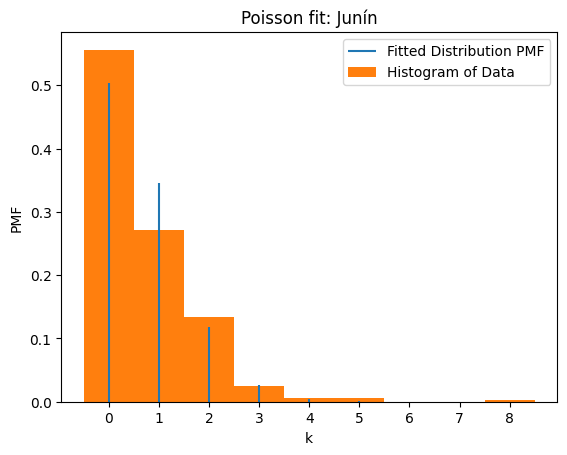

Fecha_Ingreso_Pedido
0    247
1     93
2     20
3      4
4      1
Name: count, dtype: int64
FitParams(mu=0.40821916758004734, loc=0.0)


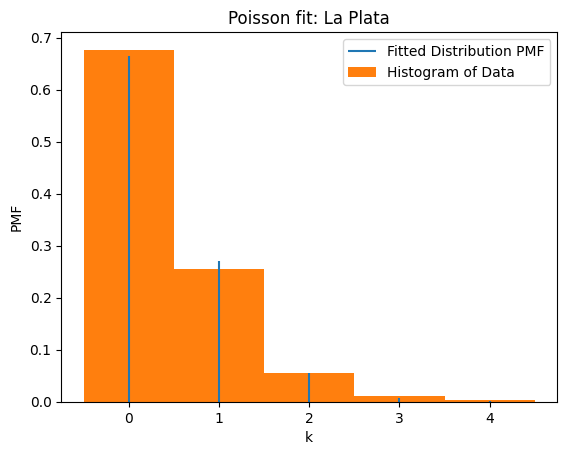

Fecha_Ingreso_Pedido
1    150
0    138
2     44
3     22
4      4
6      3
7      2
5      2
Name: count, dtype: int64
FitParams(mu=0.9917808362263095, loc=0.0)


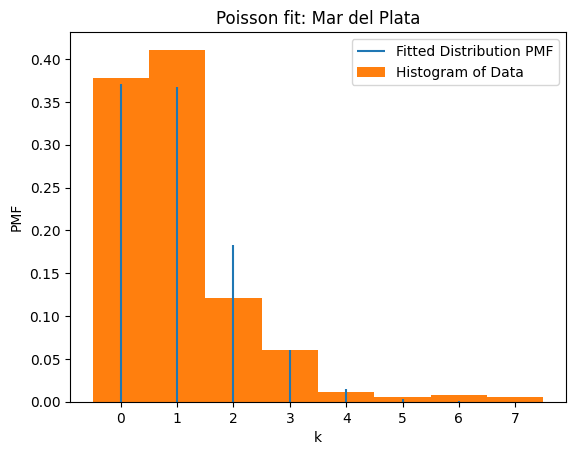

Fecha_Ingreso_Pedido
0    323
1     36
2      6
Name: count, dtype: int64
FitParams(mu=0.13150684542050187, loc=0.0)


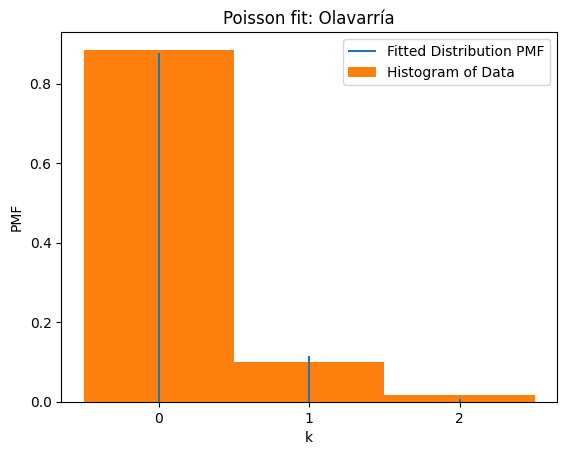

Fecha_Ingreso_Pedido
0    215
1    117
2     27
3      4
4      2
Name: count, dtype: int64
FitParams(mu=0.33198321452558877, loc=3.0)


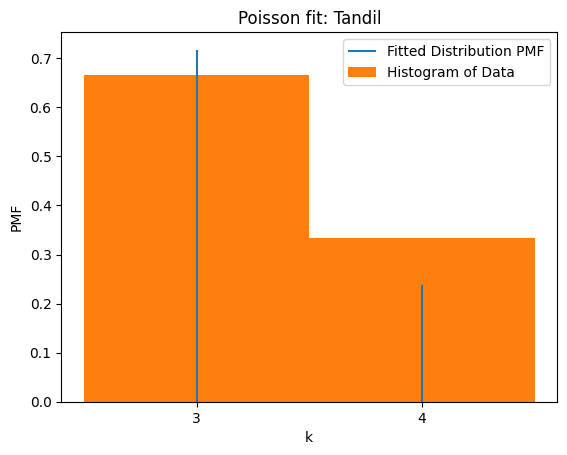

In [210]:
destinos = ['Junín', 'La Plata', 'Mar del Plata', 'Olavarría', 'Tandil']
df_frec_pedidos = pd.DataFrame()

for destino in destinos:
    df1 = df[(df['Destino'] == destino)]
    pedidos_por_dia1 = df1['Fecha_Ingreso_Pedido'].groupby(by = df1['Fecha_Ingreso_Pedido']).size().reindex(pd.date_range(start= '2022-01-01', end= '2022-12-31'), fill_value=0)
    frec_pedidos1 = pedidos_por_dia1.value_counts()
    df_frec_pedidos[destino] = frec_pedidos1
    # plt.pie(frec_pedidos,labels = frec_pedidos.index)
    print(frec_pedidos1)
    # plt.hist(pedidos_por_dia1, bins = 7)
    # plt.title(destino)
    # plt.show()
    res1 = stats.fit(data = pedidos_por_dia1, dist = stats.poisson, bounds= [(0,50),(0,100)])
    print(res1.params)
    res1.plot()
    plt.title("Poisson fit: " + destino)
    plt.show()
    

In [ ]:
data = [1, 2, 2, 3, 3, 3, 4, 4, 4, 4]

# Define a probability mass function for the expected distribution
def pmf(x):
    return stats.poisson.pmf(x, mu=0.59)

# Calculate the observed and expected frequencies
observed, _ = np.histogram(data, bins=max(data)-min(data)+1, range=(min(data)-0.5, max(data)+0.5))
expected = np.array([len(data)*pmf(i) for i in range(min(data), max(data)+1)])

# Perform the Chi-square goodness-of-fit test
chi2, p = stats.chisquare(observed, expected, ddof=0)

# Print the test results
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p:.4f}")

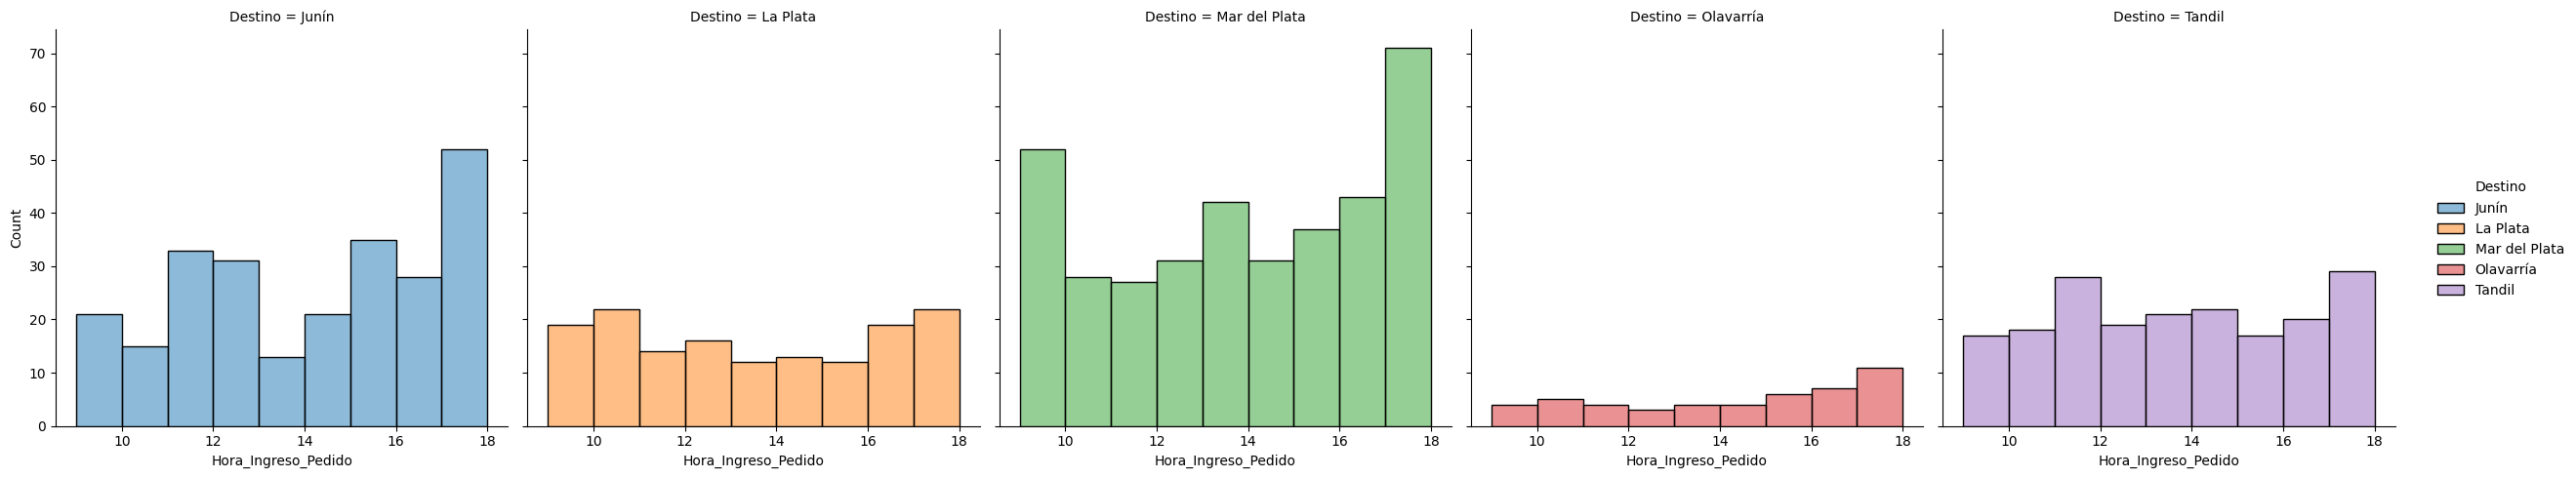

In [111]:
sns.displot(x = 'Hora_Ingreso_Pedido', data = df, hue = 'Destino', bins =9, col = 'Destino')

In [123]:
df['Hora_Ingreso_Pedido'].describe()
#HAY 10 HORAS DE OFICINA

count    999.000000
mean      13.450450
std        2.864911
min        9.000000
25%       11.000000
50%       14.000000
75%       16.000000
max       18.000000
Name: Hora_Ingreso_Pedido, dtype: float64

Fecha_Ingreso_Pedido
21    3
31    2
15    1
33    1
13    1
35    1
28    1
Name: count, dtype: int64
FitParams(mu=24.89999829103541, loc=0.0)


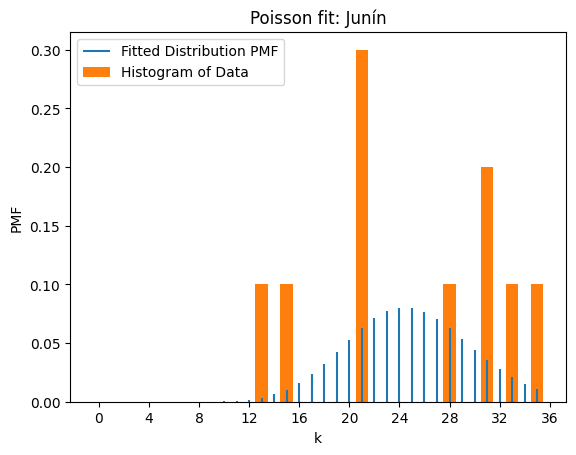

Fecha_Ingreso_Pedido
19    2
12    2
13    2
22    1
14    1
16    1
9     1
Name: count, dtype: int64
FitParams(mu=13.89999262608188, loc=1.0)


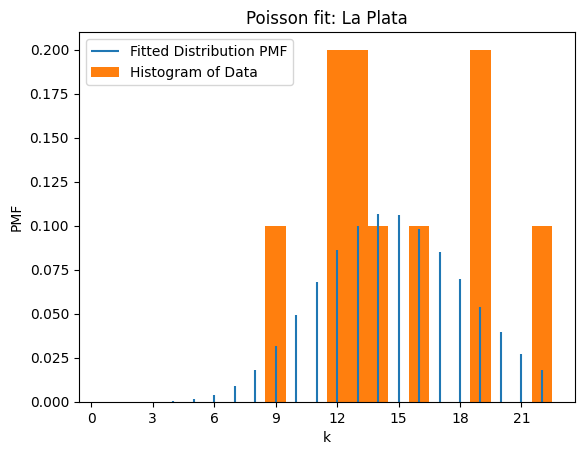

Fecha_Ingreso_Pedido
27    2
31    2
52    1
28    1
42    1
37    1
43    1
44    1
Name: count, dtype: int64
FitParams(mu=36.200003237420766, loc=0.0)


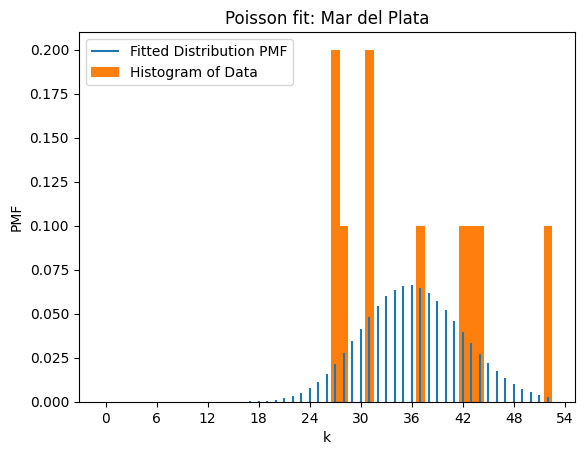

Fecha_Ingreso_Pedido
4    4
5    1
3    1
6    1
7    1
9    1
2    1
Name: count, dtype: int64
FitParams(mu=2.7999997541653974, loc=2.0)


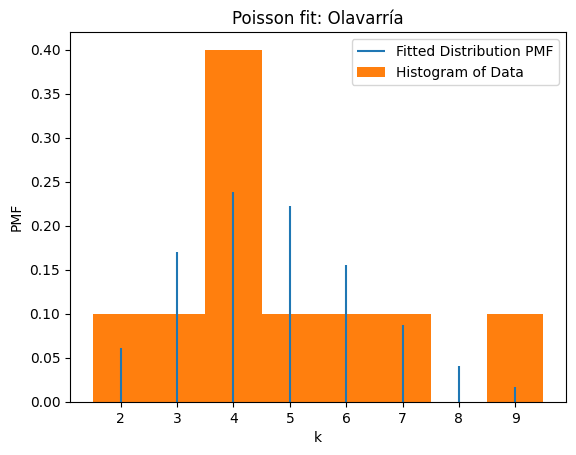

Fecha_Ingreso_Pedido
17    2
19    2
18    1
28    1
21    1
22    1
20    1
10    1
Name: count, dtype: int64
FitParams(mu=19.099982515430302, loc=0.0)


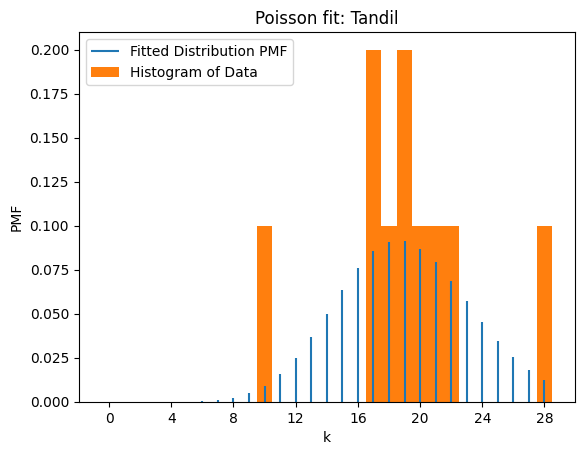

In [127]:
destinos = ['Junín', 'La Plata', 'Mar del Plata', 'Olavarría', 'Tandil']
df_frec_pedidos = pd.DataFrame()

for destino in destinos:
    df1 = df[df['Destino'] == destino]
    pedidos_por_dia1 = df1['Fecha_Ingreso_Pedido'].groupby(by = df1['Hora_Ingreso_Pedido']).count()
    frec_pedidos1 = pedidos_por_dia1.value_counts()
    df_frec_pedidos[destino] = frec_pedidos1
    # plt.pie(frec_pedidos,labels = frec_pedidos.index)
    print(frec_pedidos1)
    # plt.hist(pedidos_por_dia1, bins = 7)
    # plt.title(destino)
    # plt.show()
    res1 = stats.fit(data = pedidos_por_dia1, dist = stats.poisson, bounds= [(0,50),(0,100)])
    print(res1.params)
    res1.plot()
    plt.title("Poisson fit: " + destino)
    plt.show()